## **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/student_grades.csv')

In [3]:
data.head()

,student_id,math,science,cs,band,english,history,spanish,physed
0,1,46,48,50,74,34,44,39,73
1,2,66,65,65,66,74,80,75,63
2,3,55,53,50,76,71,72,76,71
3,4,53,57,53,80,77,77,85,82
4,5,55,62,58,67,82,77,78,60


In [4]:
X = data.drop('student_id',axis=1)

In [6]:
## Scale the model
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
X_std = sd.fit_transform(X)

In [8]:
## fit tSNE model
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_transformed = pd.DataFrame(tsne.fit_transform(X_std), columns=['component1','component2'])


In [9]:
X_transformed.head()

,component1,component2
0,0.330800,-6.146821
1,0.348588,3.492629
2,-2.216990,0.421706
3,-4.383247,0.910974
4,0.777133,2.669885


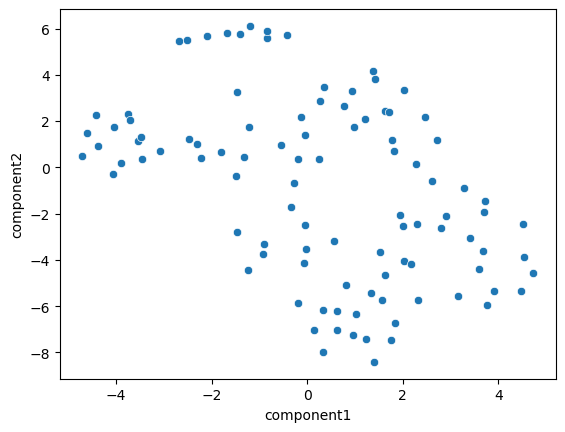

In [10]:
sns.scatterplot(
    data=X_transformed,
    x='component1',
    y='component2'
)
plt.xlabel('component1')
plt.ylabel('component2')
plt.show();

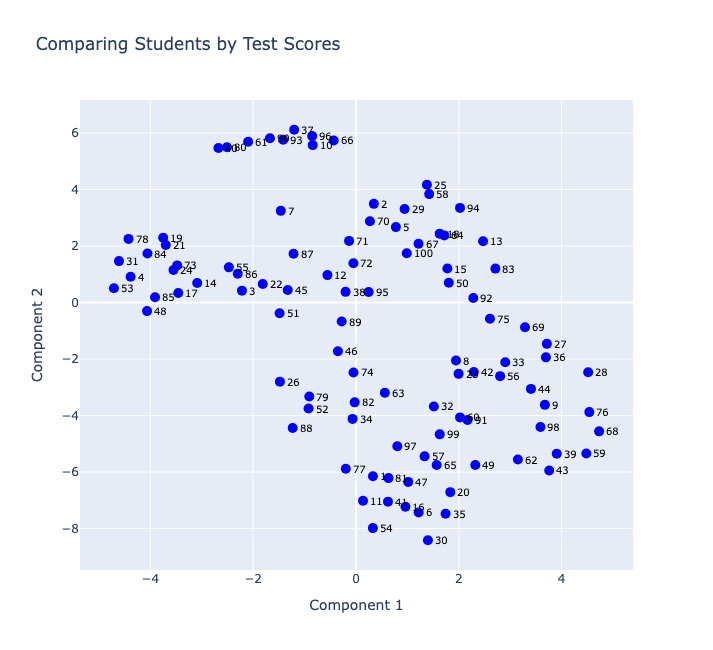

In [12]:
import plotly.graph_objects as go

# Create a Plotly scatter plot with labels
fig = go.Figure()

# Scatter plot trace
scatter_trace = go.Scatter(
    x=X_transformed['component1'],
    y=X_transformed['component2'],
    mode='markers',
    marker=dict(color='blue', size=10),
    text=data['student_id'],  # Labels for hover
)

# Add trace to the figure
fig.add_trace(scatter_trace)

# Add data labels using annotations
for i, label in enumerate(data['student_id']):
    fig.add_annotation(
        x=X_transformed['component1'].iloc[i],
        y=X_transformed['component2'].iloc[i],
        text=label,
        showarrow=False,
        xanchor='left',
        xshift=5,
        font=dict(color='black', size=10),
    )

# Update layout with axis labels
fig.update_layout(
    title='Comparing Students by Test Scores',
    xaxis=dict(title='Component 1'),
    yaxis=dict(title='Component 2'),
    height=650,
    width=1000,
)

# Show the interactive plot
fig.show()